# **Computational Methods**
## **COMPLEX NUMBERS**

Written by Niv Keren, nivkeren1@mail.tau.ac.il 

*Computational Methods* class: 0341-2300

2020/Semester I; Tuesdays 14:00-16:00

FACULTY OF EXACT SCIENCES | GEOPHYSICS & PLANETARY SCIENCES  
Tel Aviv University

---
Python allows a very convenient treatment of complex numbers  

Unless defined otherwise, *'i'* is the *'i'* we all know from complex
number notation - square root of -1.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6.67]

In [5]:
(-1) ** 0.5

(6.123233995736766e-17+1j)

Here you can also see the default way in which Python prints complex numbers  
This is also one way we can write complex numbers and input  
them to Python. Note the absence of any multiplication sign  
between the number and *j*.

In [6]:
c1 = 1-2j
c1

(1-2j)

Another way to construct a complex number is using the
built-in function 'complex'.

In [7]:
c1 = complex(1,-2)
c1

(1-2j)

All the arithmetic operations are defined on the  
complex numbers as we expect them to be.

In [8]:
c2 = 3 * ( 2 - 3j)
print(c2)

c3 = (-2) ** 0.5
print(c3)

c4 = (c1 + c2) / c3
print(c4)

(6-9j)
(8.659560562354934e-17+1.4142135623730951j)
(-7.7781745930520225-4.949747468305833j)


the functions `np.real()` and `np.imag()` extract the real and the imaginary part of the complex number

In [9]:
c4r = np.real(c4)

c4i = np.imag(c4)

print(c4r, c4i)

-7.7781745930520225 -4.949747468305833


For polar (Euler) representation of complex numbers we
need the absolute value and the phase.

The absolute value is obtained with the function `np.abs()`.

In [10]:
np.abs(c4)

9.219544457292887

The phase is obtained with the function `np.angle()`.
The phase is in radians betwee -pi and pi.

In [11]:
np.angle(c4)

-2.5748634360662868

The number can be easily reconstructed from the
absolute value and the phase.

In [12]:
r = np.abs(c1)
phi = np.angle(c1)

r * np.exp(phi* 1j)

(1.0000000000000002-2j)

We can also use the built-in function `np.conj()` to get the complex conjugate ('tzamud').

In [13]:
print(c1)
c1_conj = np.conj(c1)
print(c1_conj)

(1-2j)
(1+2j)


## **POLYNOMIALS**
--------------------
Python has some neat built-in functions to perform operations on polynomials.


Python represents a polynomial as numpy `poly1d` class. [Documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html)  
The first element hold the coefficient of the highest power, and the last holds the coefficient of the zeroth power.

This polynomial  
**_x^4 - 12*x^3 + 25*x + 116_**

In [14]:
p = np.poly1d([1, -12, 0, 25, 116])
print(p)

   4      3
1 x - 12 x + 25 x + 116


ploy1d contains many attributes (see documentation).  
one of them is 'roots' or 'r' a 1D Array with the roots of the polynomial.

In [15]:
p.roots

array([11.74728287+0.j        ,  2.70282074+0.j        ,
       -1.22505181+1.46720801j, -1.22505181-1.46720801j])

Operations defined between polynomials

In [16]:
a = np.poly1d([1, 2, 3, 4])
b = np.poly1d([1, 4, 9, 16])

Addition is very simply an element-by-element addition.

In [17]:
a + b

poly1d([ 2,  6, 12, 20])

Multiplication is equivalent to convolution, so the function `convolve` is used to perform it.  
the function returns an array not poly1d

In [18]:
np.convolve(a, b)

array([ 1,  6, 20, 50, 75, 84, 64])

Python can also calculate derivatives and integrals of polynomials.  
**Derivative**

In [19]:
c = np.poly1d(np.convolve(a, b))
d = np.polyder(c)
d

poly1d([  6,  30,  80, 150, 150,  84])

In [20]:
print("2nd derivetive of c")
print(np.polyder(c, 2))
print("1st derivetive of d")
print(np.polyder(d))

2nd derivetive of c
    4       3       2
30 x + 120 x + 240 x + 300 x + 150
1st derivetive of d
    4       3       2
30 x + 120 x + 240 x + 300 x + 150


**Integral**  
The additional argument is the integration constant.
If no constant is specified, the default is 0.

In [21]:
print(np.polyint(d))
print(np.polyint(d,k=64))

   6     5      4      3      2
1 x + 6 x + 20 x + 50 x + 75 x + 84 x
   6     5      4      3      2
1 x + 6 x + 20 x + 50 x + 75 x + 84 x + 64


The function `polyval` evaluates a polynomial
in specified locations.

In [22]:
print(np.polyval(c ,1))
print(np.polyval(c, -4))
np.polyval(c, np.array([1, 5, 9]))

300
800


array([    300,   55484, 1060300])

For example, let's plot the polynomial  
**_x^3+4*x^2-7*x-10_**  
between *x = -1* and *x = 3*.

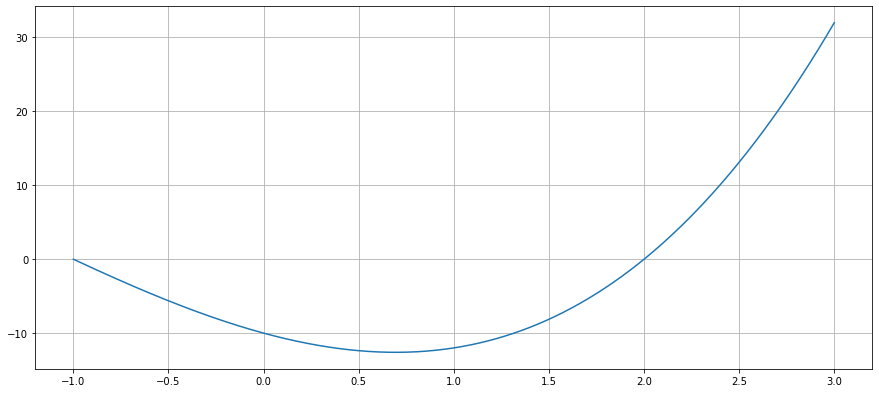

In [23]:
p = np.poly1d([1, 4, -7, -10])
x = np.linspace(-1 ,3 ,1000)
v = np.polyval(p, x)
plt.plot(x, v)
plt.grid()
plt.show()

Using the plot we can test polynomial roots

In [24]:
p.roots

array([-5.,  2., -1.])

We can also examine where the derivative is zero

In [25]:
p.deriv().roots

array([-3.36092084,  0.69425418])

Numpy also offers a way to fit a polynomial to data.  
By `fit` we mean in the least squares sense,  
i.e., the polynomial whose averaged sum of squared distances
from the points is minimal.

In [26]:
x = np.arange(0, 1.1, 0.1)
y = np.array([-.447, 1.978, 3.28, 6.16, 7.08, 7.34, 7.66, 9.56, 9.48, 9.3, 11.2])

We use the function `scatter` to get a scatter plot,  
where the points are not connected with lines and there are only markers in the form of empty circles.  
Obviously we can obtain the same plot using `plot`

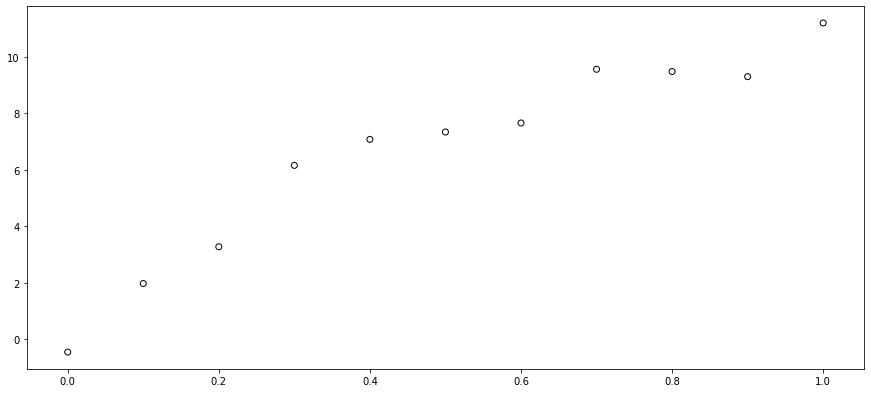

In [27]:
plt.scatter(x, y, marker='o', facecolors='none', edgecolors='k')
plt.show()

To fit a polynomial to the data we use the function `np.polyfit` .  
Besides the input x and y data, we also have to specify the degree of the polynomial we wish to fit.

In [28]:
p1 = np.poly1d(np.polyfit(x, y, 1))
p2 = np.poly1d(np.polyfit(x, y, 2))
p10 = np.poly1d(np.polyfit(x, y, 10))

print(f"p1 = {p1}")
print(f"p2 = {p2}")
print(f"p10 = {p10}")

p1 =  
10.32 x + 1.44
p2 =         2
-9.811 x + 20.13 x - 0.03167
p10 =             10             9             8             7             6
-4.644e+05 x  + 2.296e+06 x - 4.877e+06 x + 5.823e+06 x - 4.295e+06 x
              5             4            3             2
 + 2.021e+06 x - 6.032e+05 x + 1.09e+05 x - 1.063e+04 x + 436 x - 0.447


We'll plot the polynomial we fitted on the scatter

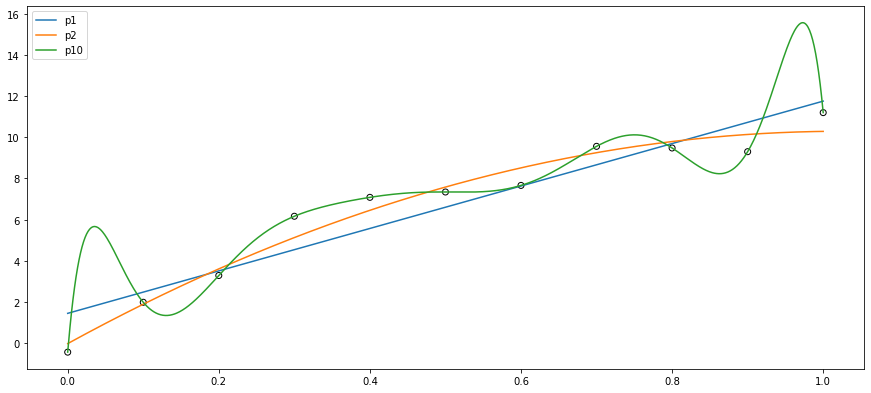

In [29]:
xx = np.linspace(0,1,1000);

plt.scatter(x, y, marker='o', facecolors='none', edgecolors='k')
plt.plot(xx, np.polyval(p1, xx), label="p1")
plt.plot(xx, np.polyval(p2, xx), label="p2")
plt.plot(xx, np.polyval(p10, xx), label="p10")
plt.legend()
plt.show()

Reminder: we started class with an explanation about Least-square fitting.  
The following website gives another introduction to the topic:
http://mathworld.wolfram.com/LeastSquaresFitting.html